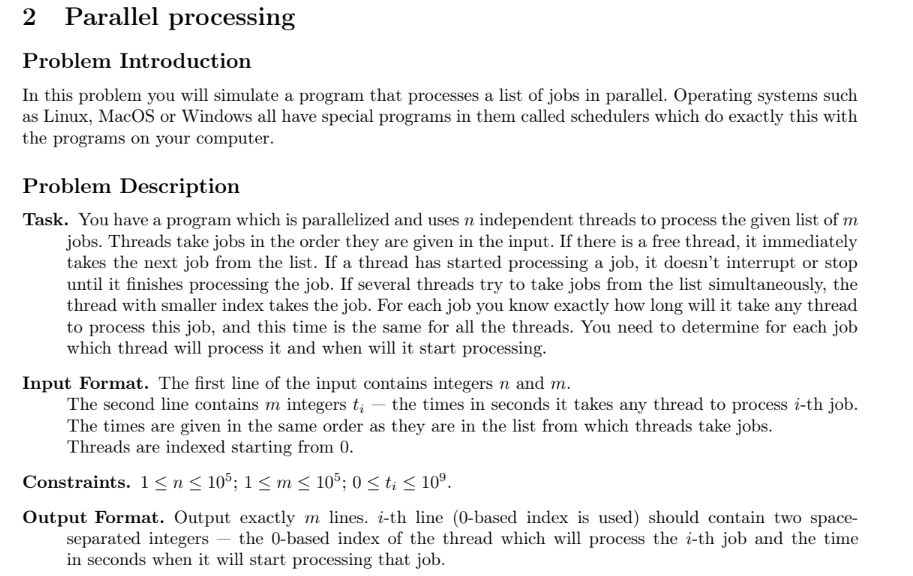

Samples

Input: 
<pre>2 5
1 2 3 4 5</pre>

This means this operating system has 2 threads to process the 5 jobs that is scheduled. 

Output:
<pre>0 0
1 0
0 1
1 2
0 4</pre>

What we see here is the 0-based index of the thread as well as the time in seconds when the jobs scheduled will start. 
* Thread 0 will begin working on the first job after 0 seconds. 
* Thread 1 will process the second job immediately after 0 seconds.
* Thread 0 will then start working on the third job after 1 seconds, 
* Thread 1 since it took two seconds to work on the second job, this thread begins the fourth job after 2 seconds.
* Finally thread 0 will after working on the first and third job begin working on the fifth job after four seconds.

What are the entities involved (threads, jobs, times)?

The entities are the threads, jobs and times. The threads are the computing units that can process jobs. The jobs are the programs that run on the CPU and times is the time it takes to run those instructions related to that job.

What does it mean for a thread to be free?

A thread is free when it's not working on any instructions of a program.

What happens when two threads become free at the same time?

When two threads become free at the same time, they can both pop a job of the schedule and process it. Whichever requets first gets the first job.

What does the program have to output exactly?

It has to output in sequence of the jobs that are schedule what thread is performing it and at what time (in-seconds) from the beginning of the program.

⚙️ Step 2 — Systems Model

You have:

n threads, indexed 
0
,
1
,
2
,
…
,
𝑛
−
1
0,1,2,…,n−1

m jobs, each with a duration 
𝑡
𝑖
t
i
	​


All threads start free at time 0.

Rules:

When a thread becomes free, it takes the next job in the list.

If multiple threads become free simultaneously, the one with the smaller index takes the next job first.

You need to determine for every job:

which thread processes it,

when it starts.

🧠 Step 3 — Abstract the Process

If you think like an OS scheduler:

Each thread has a next available time.

When assigning a job, you pick the thread with the earliest next available time.

If there’s a tie, pick the smaller thread index.

Update that thread’s next available time = (current next available time + job duration).

You must simulate this efficiently — because 
𝑛
,
𝑚
≤
10
5
n,m≤10
5
.

🔍 Step 4 — Reason about Data Structures (Before Coding)

The naive way would be:
for each job, scan all threads to find the earliest available one → O(n × m).
That’s far too slow.

Instead, what property of the process suggests a heap (priority queue) might be appropriate?

Think:

You repeatedly need to extract the thread with the smallest “next available time” (and smallest index on ties).

Then, after assigning a job, that thread’s next available time changes, and you push it back.

That’s a perfect case for a min-heap where each entry is a pair:

🧩 Step 5 — What You Should Do Next

Before coding, do this exercise by hand:

Choose 𝑛 = 2, m = 5

and job times  [1,2,3,4,5].

Simulate step-by-step:

Which thread picks which job, at what time.

Track a small table:

Job	Duration	Thread	Start Time	End Time

Observe how the “earliest available thread” logic plays out.

This hand simulation will reveal the invariant that drives your algorithm.

In [28]:
import heapq

In [29]:
n = 3
heap = []

for i in range(0,n):
    heap.append((0,i))

heapq.heappush(heap, (1,0))
heap

[(0, 0), (0, 1), (0, 2), (1, 0)]

In [30]:

heapq.heappop(heap)


(0, 0)

In [20]:
heap

[(0, 1), (1, 0), (0, 2)]

In [35]:
def parallel_processing(n,m, jobs):
    
    heap = []
    for i in range(0,n):
        heap.append((0,i))
    heapq.heapify(heap)

    output = []

    for t in jobs:
        next_available_thread = heapq.heappop(heap)

        output.append((next_available_thread[1], next_available_thread[0]))

        new_free_time = next_available_thread[0] + t

        heapq.heappush(heap,(new_free_time, next_available_thread[1]))

    return output



In [36]:
parallel_processing(2,5,[1,2,3,4,5])

[(0, 0), (1, 0), (0, 1), (1, 2), (0, 4)]